In [1]:
!pip install --upgrade matplotlib

Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.3.0)


In [2]:
import numpy as np
import matplotlib as ml
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
ml.style.use('ggplot')

# For advanced plotting
from mpl_toolkits.mplot3d import Axes3D,proj3d
from matplotlib.patches import FancyArrowPatch

Populating the interactive namespace from numpy and matplotlib


## Creating and visualizing the dataset (random)
So basically I am creating a 40 x 3 dataset which has been equally divided into 2 classes : 20 for class 1, 20 for class 2.
So we create two separate sub-datasets of shape = (20,3) ; one of each class.

Then we create one major dataset representing the actual dataset, but without the class labels.

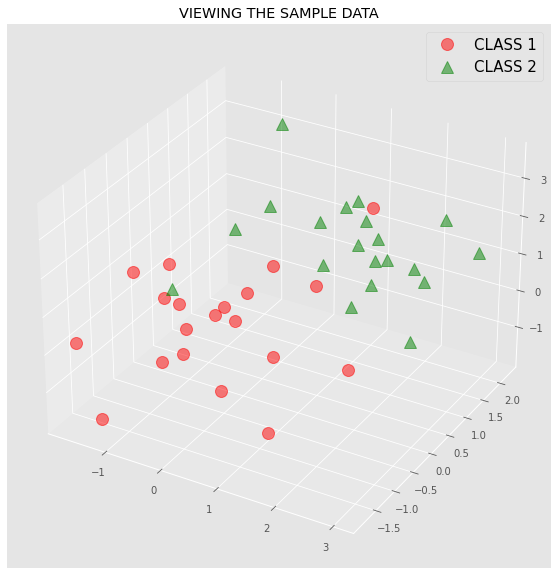

In [3]:
# Randomly assigning mean and covariance matrix(sample)
mean1,mean2 = np.array([0,0,0]),np.array([1,1,1])
cov1,cov2 = np.array([[1,0,0],[0,1,0],[0,0,1]]),np.array([[1,0,0],[0,1,0],[0,0,1]])
data_class1 = np.random.multivariate_normal(mean1,cov1,size=20).T  # As original operation gives a (20,3) matrix and transposing gives the desired shape for calculations = (3,20)
data_class2 = np.random.multivariate_normal(mean2,cov2,size=20).T
# Total data minus the class labels
data = np.concatenate((data_class1,data_class2),axis=1)

# Plotting the data to see how it stands currently
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,projection='3d')
plt.rcParams['legend.fontsize'] = 15
ax.plot(data_class1[0,:],data_class1[1,:],data_class1[2,:],'o',markersize=12,color='red',alpha=0.5,label='CLASS 1')
ax.plot(data_class2[0,:],data_class2[1,:],data_class2[2,:],'^',markersize=12,color='green',alpha=0.5,label='CLASS 2')
plt.title('VIEWING THE SAMPLE DATA')
ax.legend(loc='upper right')
plt.show()

In [4]:
data

array([[ 1.23749383,  1.34010458,  2.22859595, -0.2779287 , -0.38451   ,
        -1.05540893, -0.8321241 , -1.05504718,  0.23712493, -1.49389297,
        -1.24650057,  1.48876863,  0.34197978,  0.85497704, -1.7095307 ,
        -0.2614502 , -1.10577671, -0.62704528,  0.24845266, -0.11160277,
         1.44039692,  0.77995649,  0.74810871,  2.10295812,  2.28786651,
         1.25884658, -0.19781209, -0.46003804,  0.61230271,  2.15042277,
         1.05234228,  1.24735435, -0.28203166,  2.92923124, -0.29458446,
         1.88866899,  3.0059919 ,  2.56582759,  1.11195494,  0.50770785],
       [ 1.61903803, -0.04407644, -0.55040387, -1.61270832,  0.07662872,
         0.01688655, -0.43845367, -1.24033902, -1.7875572 , -1.50734584,
        -0.12509378, -1.48679557, -0.68054006, -1.74781987, -1.77094338,
         1.1752482 , -0.45807426,  0.16740237,  0.44301125,  0.2810317 ,
        -0.02703982,  2.17218191,  0.93266039,  1.42919114,  0.38103787,
         1.6695566 ,  0.10724926,  1.37166418,  2.

## Major Calculations
1. Calculate means for each dimension(each feature)
2. Calculate the covariance matrix.
3. Calculate the eigen values and the eigen vectors.
(Visualize the eigen vectors for understanding)
4. Sort in descending order and extract first 'k' eigen value-eigen vector pairs. (Here, k = 2)
5. Transform the original data to the new subspace**(FORMULA : y = W.T.dot(original_data))** and visualize the new subspace + the projected data.

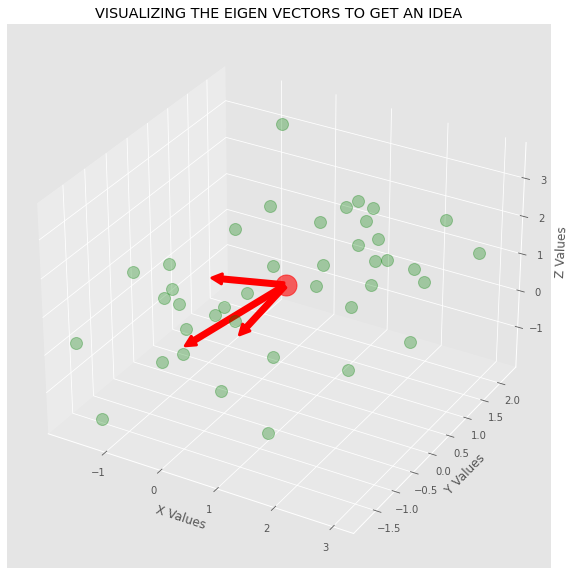

In [9]:
# Step 1
mean_x,mean_y,mean_z = np.mean(data[0,:]),np.mean(data[1,:]),np.mean(data[2,:])
means_vector = np.array([[mean_x],[mean_y],[mean_z]])
# Step 2
cov_matrix = np.cov([data[0,:],data[1,:],data[2,:]])
# Step 3
eigen_vals,eigen_vects = np.linalg.eig(cov_matrix)
# Plotting the eigen vectors to visualize it.
class Arrow3D(FancyArrowPatch):
  def __init__(self,xs,ys,zs,*args,**kwargs):
    FancyArrowPatch.__init__(self,(0,0),(0,0),*args,**kwargs)
    self._verts3d = xs,ys,zs
  def draw(self,renderer):
    xs3d,ys3d,zs3d = self._verts3d
    xs,ys,zs = proj3d.proj_transform(xs3d,ys3d,zs3d,renderer.M)
    self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
    FancyArrowPatch.draw(self,renderer)

fig1 = plt.figure(figsize=(20,10))
ax = fig1.add_subplot(111,projection='3d')
ax.plot(data[0,:],data[1,:],data[2,:],'o',markersize=12,color='green',alpha=0.3)
# Plot the mean
ax.plot([mean_x],[mean_y],[mean_z],'o',markersize='21',color='red',alpha=0.6)
# Plotting the eigen vectors
for vector in eigen_vects.T:
  a = Arrow3D([mean_x,vector[0]],[mean_y,vector[1]],[mean_z,vector[2]],mutation_scale=20,lw=3,arrowstyle="simple",color='r')
  ax.add_artist(a)
ax.set_xlabel("X Values")
ax.set_ylabel("Y Values")
ax.set_zlabel("Z Values")
plt.title("VISUALIZING THE EIGEN VECTORS TO GET AN IDEA")
plt.show()

In [17]:
# Step 4 (here k = 2)
eigen_tups = [(np.abs(eigen_vals[i]),eigen_vects[:,i]) for i in range(len(eigen_vals))]
eigen_tups.sort(key=lambda x: x[0],reverse=True)
# Choosing top 2
W = np.hstack((eigen_tups[0][1].reshape(3,1),eigen_tups[1][1].reshape(3,1)))
W   # Shape = (3,2)

array([[-0.62241118, -0.6294215 ],
       [-0.6344519 ,  0.05765862],
       [-0.45833951,  0.77492197]])

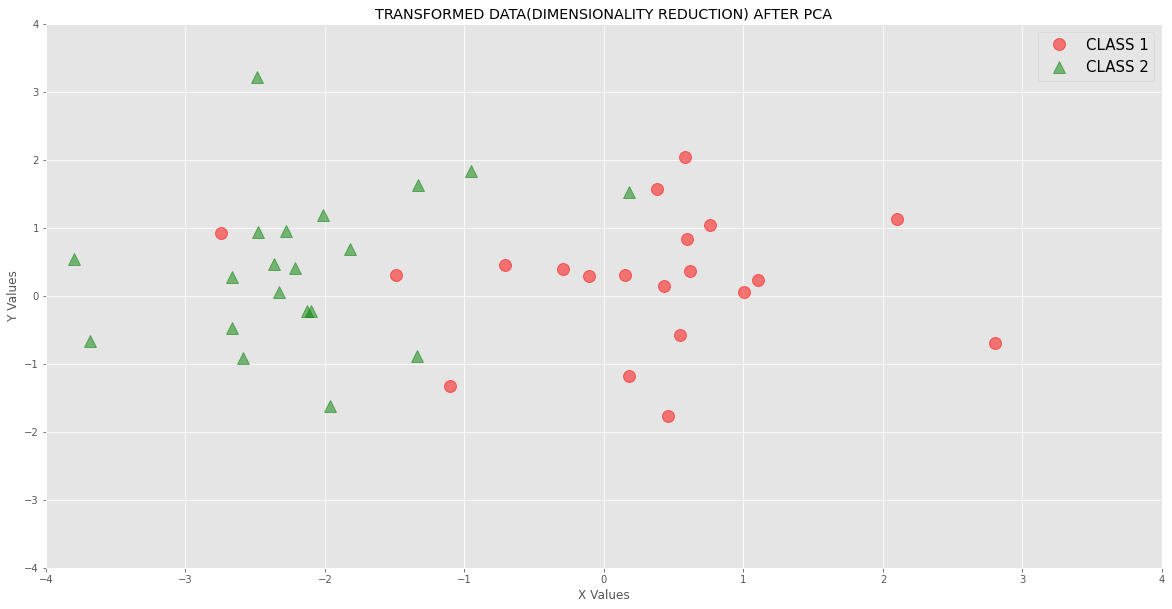

In [21]:
# Step 5 
'''Formula for transformation to new subspace : y = W.T.dot(data)
---> CHECK : W = (3,2), W.T = (2,3), data = (3,40). 
So, y = (2,40). 
Hence dimensionality reduction is successful.
'''
data_pca = W.T.dot(data)
# data_pca
# Plot
plt.figure(figsize=(20,10))
plt.rcParams['legend.fontsize'] = 15
plt.plot(data_pca[0,:20],data_pca[1,:20],'o',markersize=12,color='red',alpha=0.5,label='CLASS 1')   # As first 20 belong to the first class(since the dataset has been made by simple concatenation)
plt.plot(data_pca[0,20:40],data_pca[1,20:40],'^',markersize=12,color='green',alpha=0.5,label='CLASS 2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.legend()
plt.title('TRANSFORMED DATA(DIMENSIONALITY REDUCTION) AFTER PCA')
plt.show()